### Importing the dependencies

In [7]:
import tensorflow as tf
tf.random.set_seed(3)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers,Sequential,datasets

## Loading the dataset

In [2]:
(X_train,X_test) , (Y_train,Y_test) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
type(X_train) , type(X_test)

(numpy.ndarray, numpy.ndarray)

In [11]:
np.unique(X_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Display an image from the dataset

<function matplotlib.pyplot.imshow(X: 'ArrayLike | PIL.Image.Image', cmap: 'str | Colormap | None' = None, norm: 'str | Normalize | None' = None, *, aspect: "Literal['equal', 'auto'] | float | None" = None, interpolation: 'str | None' = None, alpha: 'float | ArrayLike | None' = None, vmin: 'float | None' = None, vmax: 'float | None' = None, colorizer: 'Colorizer | None' = None, origin: "Literal['upper', 'lower'] | None" = None, extent: 'tuple[float, float, float, float] | None' = None, interpolation_stage: "Literal['data', 'rgba', 'auto'] | None" = None, filternorm: 'bool' = True, filterrad: 'float' = 4.0, resample: 'bool | None' = None, url: 'str | None' = None, data=None, **kwargs) -> 'AxesImage'>

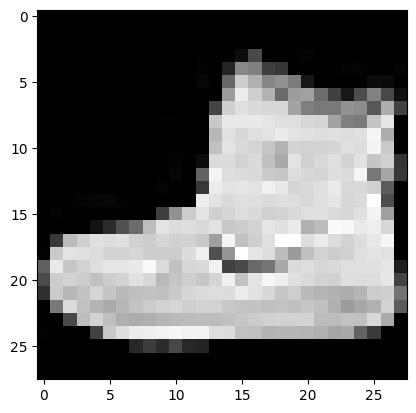

In [12]:
plt.imshow(X_train[0],cmap='gray')
plt.imshow

In [15]:
X_train.shape[0]

60000

### Normalize the pixel values in images

In [16]:
X_train = X_train/255.0
Y_train = Y_train/255.0

### Reshape the images to a single channel (grayscale)

In [17]:
X_train = X_train.reshape([X_train.shape[0],28,28,1])
Y_train = Y_train.reshape([Y_train.shape[0],28,28,1])

In [18]:
X_train.shape

(60000, 28, 28, 1)

### Building the model

In [19]:
model = Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10)
])

/Users/akshays/jupyter-env/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

### Model Training

In [22]:
history = model.fit(X_train,X_test,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8108 - loss: 0.5097 - val_accuracy: 0.8563 - val_loss: 0.3784
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8793 - loss: 0.3278 - val_accuracy: 0.8838 - val_loss: 0.3114
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8963 - loss: 0.2804 - val_accuracy: 0.8925 - val_loss: 0.2866
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9080 - loss: 0.2489 - val_accuracy: 0.8965 - val_loss: 0.2827
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9191 - loss: 0.2227 - val_accuracy: 0.9017 - val_loss: 0.2782
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9248 - loss: 0.2015 - val_accuracy: 0.9017 - val_loss: 0.2839
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9323 - loss: 0.1829 - val_accuracy: 0.9002 - val_loss: 0.2965
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9381 - loss: 0.1666 - 

In [23]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1688}

### Model evaluation

In [24]:
loss,accuracy = model.evaluate(Y_train,Y_test,verbose=2)
loss, accuracy

313/313 - 0s - 1ms/step - accuracy: 0.9010 - loss: 0.3509


(0.35091474652290344, 0.9010000228881836)

### Plotting accuracy against validation accuracy

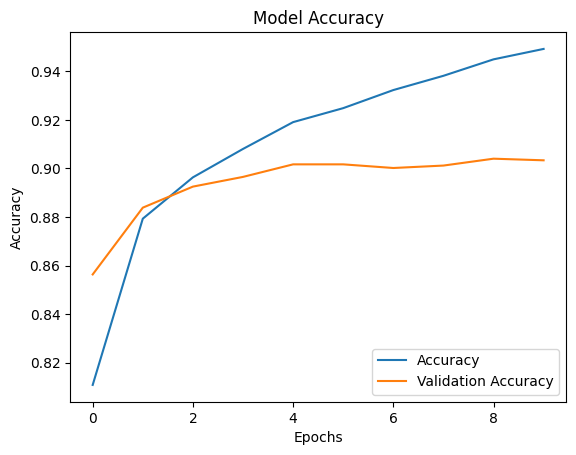

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Validation Accuracy'],loc='lower right')
plt.show()

### Plotting loss against validation loss

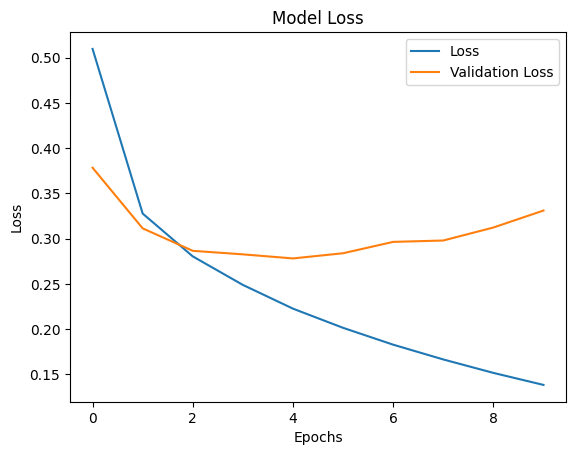

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Validation Loss'],loc='upper right')
plt.show()

In [34]:
Y_pred = model.predict(Y_train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


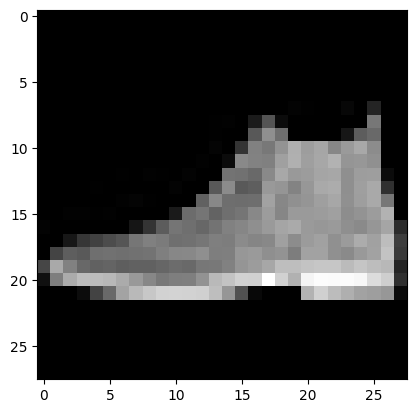

In [38]:
plt.imshow(Y_train[0],cmap='gray')
plt.show()

In [36]:
Y_pred[0]

array([-15.982515, -18.365028,  -8.24557 , -12.184302, -15.521257,
        -6.090201, -21.346275,   6.491607, -14.101648,  15.366476],
      dtype=float32)

In [40]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(9), np.int64(2), np.int64(1), np.int64(1), np.int64(6), np.int64(1), np.int64(4), np.int64(6), np.int64(5), np.int64(7), np.int64(4), np.int64(5), np.int64(7), np.int64(3), np.int64(4), np.int64(1), np.int64(2), np.int64(4), np.int64(8), np.int64(0), np.int64(2), np.int64(5), np.int64(7), np.int64(5), np.int64(1), np.int64(6), np.int64(6), np.int64(0), np.int64(9), np.int64(4), np.int64(8), np.int64(8), np.int64(3), np.int64(3), np.int64(8), np.int64(0), np.int64(7), np.int64(5), np.int64(7), np.int64(9), np.int64(6), np.int64(1), np.int64(6), np.int64(9), np.int64(6), np.int64(7), np.int64(2), np.int64(1), np.int64(2), np.int64(6), np.int64(4), np.int64(4), np.int64(5), np.int64(8), np.int64(2), np.int64(2), np.int64(8), np.int64(6), np.int64(8), np.int64(0), np.int64(7), np.int64(7), np.int64(8), np.int64(5), np.int64(1), np.int64(1), np.int64(6), np.int64(4), np.int64(7), np.int64(8), np.int64(7), np.int64(0), np.int64(2), np.int64(6), np.int64(4), np.int64(3), np.int64(1)

### Building a predictive system

In [62]:
import cv2
input_image = 'test_image_fashion.png'
input_image = cv2.imread(input_image)
print(input_image.shape)
# Got to reshape this and change the number of channels to 1
gray_image = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
print(gray_image.shape)
resized_image = cv2.resize(gray_image,(28,28))
print(resized_image.shape)
reshaped_image = np.reshape(resized_image,[1,28,28,1])
print(reshaped_image.shape)
# Normalizing the pixel values between 0 and 1
reshaped_image = reshaped_image/255.0
# print(reshaped_image.shape)
prediction = model.predict(reshaped_image)
pred_label = np.argmax(prediction)
pred_label

(480, 640, 3)
(480, 640)
(28, 28)
(1, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


np.int64(2)

### Saving the model

In [63]:
model.save('trained_fashion_mnist_model.h5')